In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\XAU_1d_data.csv")

In [3]:
df.head(5)

,Date;Open;High;Low;Close;Volume
0,2004.06.11 00:00;384;384.8;382.8;384.1;272
1,2004.06.14 00:00;384.3;385.8;381.8;382.8;1902
2,2004.06.15 00:00;382.8;388.8;381.1;388.6;1951
3,2004.06.16 00:00;387.1;389.8;382.6;383.8;2014
4,2004.06.17 00:00;383.6;389.3;383;387.6;1568


In [4]:
## Split merged column
df = df[df.columns[0]].str.split(';', expand=True)

In [5]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df

,Date,Open,High,Low,Close,Volume
0,2004-06-11,384,384.8,382.8,384.1,272
1,2004-06-14,384.3,385.8,381.8,382.8,1902
2,2004-06-15,382.8,388.8,381.1,388.6,1951
3,2004-06-16,387.1,389.8,382.6,383.8,2014
4,2004-06-17,383.6,389.3,383,387.6,1568
...,...,...,...,...,...,...
5386,2025-06-02,3298.76,3382.86,3295.75,3380.64,461738
5387,2025-06-03,3383.51,3392.19,3333.08,3352.91,436080
5388,2025-06-04,3353.93,3384.64,3343.67,3372.25,420245
5389,2025-06-05,3373.34,3403.42,3339.43,3351.98,808095


In [7]:
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.dropna(inplace=True)
df = df.sort_values('Date')

In [9]:
df

,Date,Open,High,Low,Close,Volume
0,2004-06-11,384.00,384.80,382.80,384.10,272
1,2004-06-14,384.30,385.80,381.80,382.80,1902
2,2004-06-15,382.80,388.80,381.10,388.60,1951
3,2004-06-16,387.10,389.80,382.60,383.80,2014
4,2004-06-17,383.60,389.30,383.00,387.60,1568
...,...,...,...,...,...,...
5386,2025-06-02,3298.76,3382.86,3295.75,3380.64,461738
5387,2025-06-03,3383.51,3392.19,3333.08,3352.91,436080
5388,2025-06-04,3353.93,3384.64,3343.67,3372.25,420245
5389,2025-06-05,3373.34,3403.42,3339.43,3351.98,808095


In [11]:
#EDA
df.describe()

,Date,Open,High,Low,Close,Volume
count,5391,5391.000000,5391.000000,5391.000000,5391.000000,5.391000e+03
mean,2014-12-21 05:40:02.003339008,1351.249024,1361.248208,1341.127752,1351.567527,8.707645e+04
min,2004-06-11 00:00:00,382.800000,384.800000,381.100000,382.800000,2.000000e+00
25%,2009-09-26 12:00:00,1008.135000,1018.045000,999.275000,1007.215000,2.487950e+04
50%,2014-12-24 00:00:00,1292.420000,1299.500000,1285.410000,1292.480000,7.173500e+04
75%,2020-03-17 12:00:00,1723.255000,1735.060000,1708.605000,1724.460000,1.153610e+05
max,2025-06-06 00:00:00,3435.210000,3499.940000,3366.730000,3431.480000,1.719636e+06
std,NaN,548.743404,552.815301,545.007579,549.292651,1.073524e+05


In [14]:
 df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

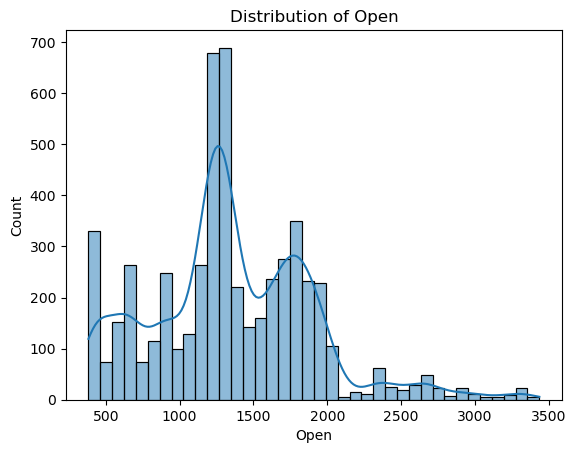

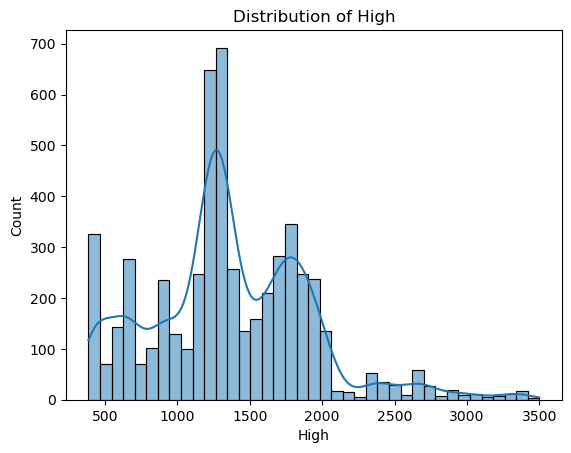

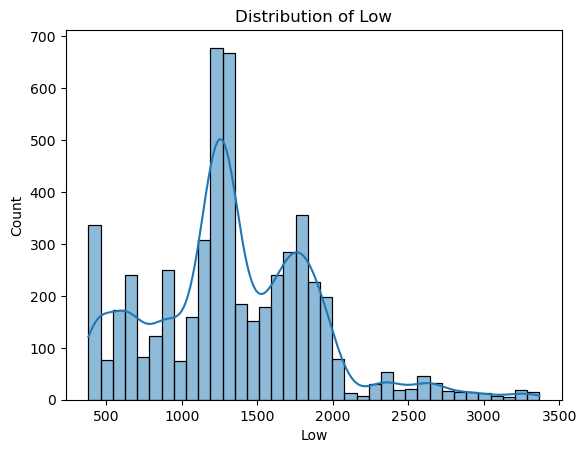

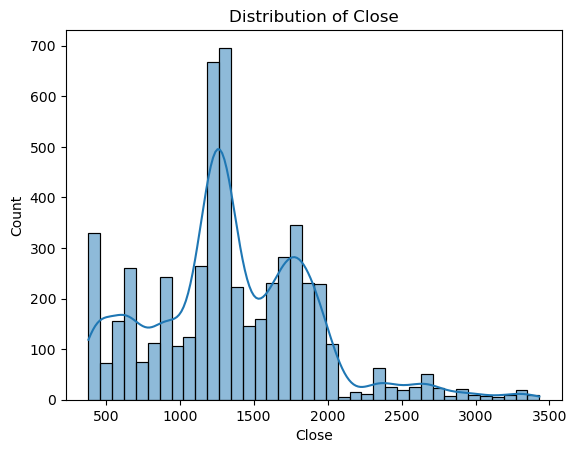

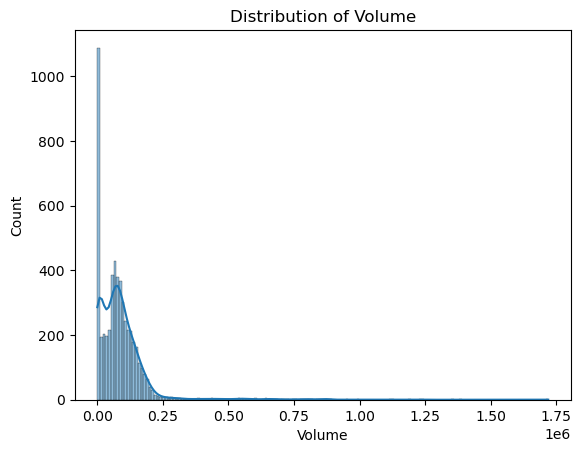

In [15]:
# Distribution of numerical columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

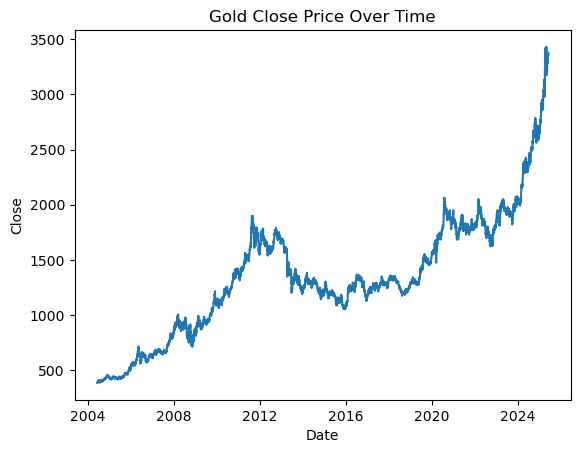

In [12]:
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Gold Close Price Over Time')
plt.show()

<Axes: >

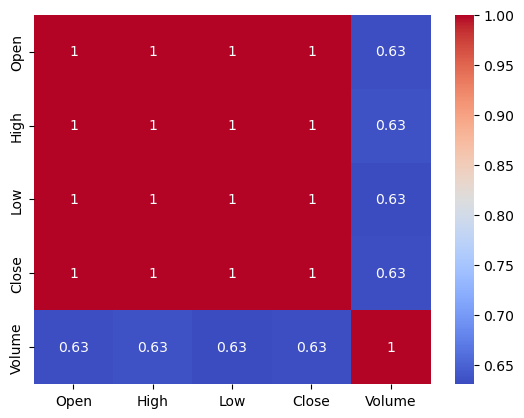

In [13]:
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')

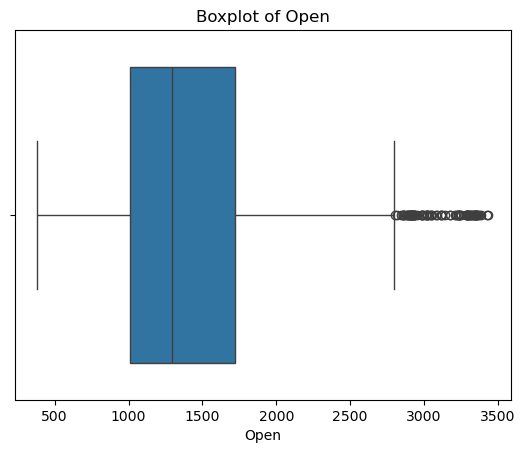

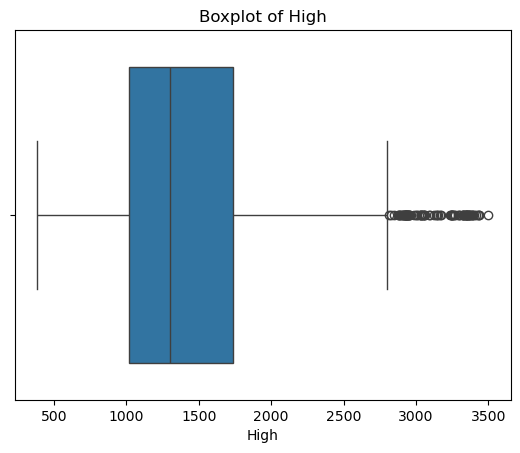

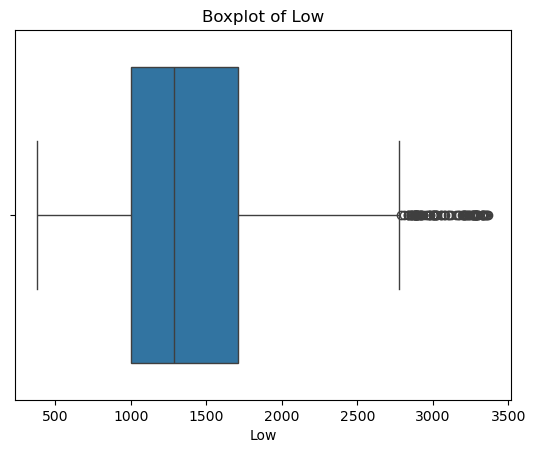

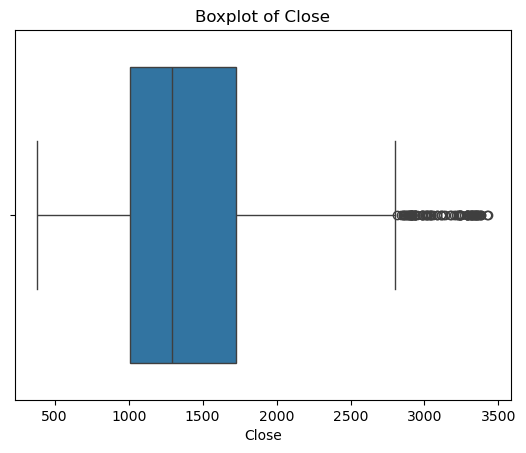

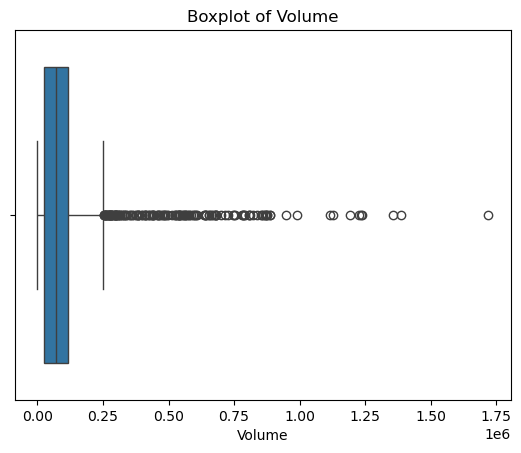

In [16]:
# Boxplots to detect outliers
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [17]:
#Feature Engineering
df['Range'] = df['High'] - df['Low']
df['Change'] = df['Close'] - df['Open']

In [18]:
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df.dropna(inplace=True)

In [19]:
df

,Date,Open,High,Low,Close,Volume,Range,Change,MA5,MA10
9,2004-06-24,394.00,402.80,393.10,401.10,1991,9.70,7.10,395.640,390.510
10,2004-06-25,402.00,402.80,400.10,401.10,1608,2.70,-0.90,397.000,392.210
11,2004-06-28,401.80,404.60,398.80,399.80,2124,5.80,-2.00,398.340,393.910
12,2004-06-29,399.80,400.50,390.30,391.30,2175,10.20,-8.50,397.780,394.180
13,2004-06-30,391.50,396.30,391.10,393.30,2131,5.20,1.80,397.320,395.130
...,...,...,...,...,...,...,...,...,...,...
5386,2025-06-02,3298.76,3382.86,3295.75,3380.64,461738,87.11,81.88,3314.928,3317.353
5387,2025-06-03,3383.51,3392.19,3333.08,3352.91,436080,59.11,-30.60,3325.434,3323.662
5388,2025-06-04,3353.93,3384.64,3343.67,3372.25,420245,40.97,18.32,3342.524,3329.398
5389,2025-06-05,3373.34,3403.42,3339.43,3351.98,808095,63.99,-21.36,3349.342,3335.133


In [20]:
#Prepare Data for Modeling
features = ['Open', 'High', 'Low', 'Volume', 'Range', 'Change', 'MA5', 'MA10']

In [21]:
X = df[features]
y = df['Close']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
#Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
#Evaluation
y_pred = model.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
print(f"Exact R²: {r2}")

Exact R²: 0.9998568689956023


In [33]:
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.5f}")

MAE: 3.87, RMSE: 6.69, R²: 0.99986


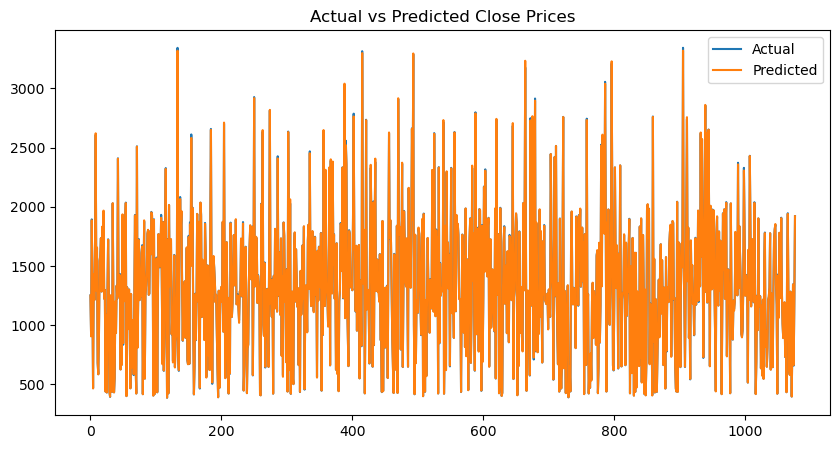

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Close Prices')
plt.show()

In [29]:
print("First 10 Predictions vs Actuals:")
for pred, actual in zip(y_pred[:10], y_test[:10]):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

First 10 Predictions vs Actuals:
Predicted: 1249.82, Actual: 1252.80
Predicted: 905.96, Actual: 912.40
Predicted: 1886.02, Actual: 1894.22
Predicted: 1303.23, Actual: 1302.33
Predicted: 466.27, Actual: 468.70
Predicted: 1431.01, Actual: 1426.75
Predicted: 1212.75, Actual: 1213.14
Predicted: 1699.93, Actual: 1700.04
Predicted: 2621.29, Actual: 2607.68
Predicted: 1291.79, Actual: 1292.13
